# Import Required Libraries
Import the necessary libraries, including pandas.

In [ ]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Load Excel File
Load the Excel file located at 'C:\Protocolo_Reposicionamiento_Probioticos\5_Integración con datos de patógenos y enfermedades\Consolidated\ST12_diseases_rare_dysbiosis_neurological.xlsx' using pandas.

In [43]:
# Load Excel File
file_path = r'C:\Protocolo_Reposicionamiento_Probioticos\5_Integración con datos de patógenos y enfermedades\Consolidated\ST12_diseases_rare_dysbiosis_neurological.xlsx'
data = pd.read_excel(file_path)  # Load the Excel file into a DataFrame

# Inspect Data
Inspect the first few rows of the loaded data using the head() function.

In [31]:
# Inspect Data
data.head()  # Display the first few rows of the DataFrame to inspect the data

,Gene,dysbiosis Disease,Rare Disease,Neurological Disease,Log2FoldChange
0,CCL4,"Obesity, Diabetes Mellitus","Anti-Basement Membrane Glomerulonephritis, Glo...",Epilepsy,5.236074
1,CSF2,"Inflammatory Bowel Diseases, Obesity, Diabetes...","Autoimmune Diseases, Acquired Immunodeficiency...","Alzheimer's Disease, Familial Alzheimer Diseas...",5.025177
2,CSF3,"Inflammatory Bowel Diseases, Obesity, Diabetes...","Autoimmune Diseases, Acquired Immunodeficiency...","Alzheimer's Disease, Amyotrophic Lateral Scler...",4.950078
3,CXCL8,"Infection caused by Helicobacter pylori, Respi...","Autoimmune Diseases, Glomerulonephritis, IGA G...","Alzheimer's Disease, Parkinson Disease, Bipola...",4.646226
4,CXCL10,"Respiratory Distress Syndrome, Inflammatory Bo...","Autoimmune Diseases, Glomerulonephritis, Acqui...",Amyotrophic Lateral Sclerosis,4.340264


In [44]:
# Clean Data
# Clean Data
# Handle missing values in disease columns by filling with empty strings
data['dysbiosis Disease'] = data['dysbiosis Disease'].fillna('')
data['Rare Disease'] = data['Rare Disease'].fillna('')
data['Neurological Disease'] = data['Neurological Disease'].fillna('')

# Correct data types if necessary
# Assuming 'Log2FoldChange' should be a float
data['Log2FoldChange'] = data['Log2FoldChange'].astype(float)

# Combine all disease columns into one for the heatmap
data['All Diseases'] = data[['dysbiosis Disease', 'Rare Disease', 'Neurological Disease']].apply(lambda x: ', '.join(filter(None, x)), axis=1)

# Remove spaces after commas and split the combined disease column by comma
data['All Diseases'] = data['All Diseases'].str.replace(', ', ',').str.split(',')

# Explode the DataFrame
data = data.explode('All Diseases')
# Handle missing values
data = data.dropna()
# Remove "ORPHA:xxxxx" patterns
data['All Diseases'] = data['All Diseases'].str.replace(r'\s*ORPHA:\d{5,6}', '', regex=True)
# Merge similar disease names
disease_mapping = {
    "Alzheimer Disease": "Alzheimer's Disease",
    "Anxiety": "Anxiety Disorders",
    "Anxiety state": "Anxiety Disorders",
    "Inflammatory Bowel Disease": "Inflammatory Bowel Diseases",
    "Autoimmune": "Autoimmune Diseases"
}

data['All Diseases'] = data['All Diseases'].replace(disease_mapping)
# Convert all disease names to lowercase
data['All Diseases'] = data['All Diseases'].str.lower()
# Verify data cleaning
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gene                  292 non-null    object 
 1   dysbiosis Disease     292 non-null    object 
 2   Rare Disease          292 non-null    object 
 3   Neurological Disease  292 non-null    object 
 4   Log2FoldChange        292 non-null    float64
 5   All Diseases          292 non-null    object 
dtypes: float64(1), object(5)
memory usage: 16.0+ KB
None
   Gene           dysbiosis Disease  \
0  CCL4  Obesity, Diabetes Mellitus   
0  CCL4  Obesity, Diabetes Mellitus   
0  CCL4  Obesity, Diabetes Mellitus   
0  CCL4  Obesity, Diabetes Mellitus   
0  CCL4  Obesity, Diabetes Mellitus   

                                        Rare Disease Neurological Disease  \
0  Anti-Basement Membrane Glomerulonephritis, Glo...             Epilepsy   
0  Anti-Basement Membrane Glomerulonephrit

In [45]:
data

,Gene,dysbiosis Disease,Rare Disease,Neurological Disease,Log2FoldChange,All Diseases
0,CCL4,"Obesity, Diabetes Mellitus","Anti-Basement Membrane Glomerulonephritis, Glo...",Epilepsy,5.236074,obesity
0,CCL4,"Obesity, Diabetes Mellitus","Anti-Basement Membrane Glomerulonephritis, Glo...",Epilepsy,5.236074,diabetes mellitus
0,CCL4,"Obesity, Diabetes Mellitus","Anti-Basement Membrane Glomerulonephritis, Glo...",Epilepsy,5.236074,anti-basement membrane glomerulonephritis
0,CCL4,"Obesity, Diabetes Mellitus","Anti-Basement Membrane Glomerulonephritis, Glo...",Epilepsy,5.236074,glomerulonephritis
0,CCL4,"Obesity, Diabetes Mellitus","Anti-Basement Membrane Glomerulonephritis, Glo...",Epilepsy,5.236074,acquired immunodeficiency syndrome
...,...,...,...,...,...,...
28,KIFC2,,Charcot-Marie-Tooth disease type 2P ORPHA:3003...,Adult-onset dystonia-parkinsonism ORPHA:199351,2.144650,charcot-marie-tooth disease type 2p
28,KIFC2,,Charcot-Marie-Tooth disease type 2P ORPHA:3003...,Adult-onset dystonia-parkinsonism ORPHA:199351,2.144650,charcot-marie-tooth disease type 4b3
28,KIFC2,,Charcot-Marie-Tooth disease type 2P ORPHA:3003...,Adult-onset dystonia-parkinsonism ORPHA:199351,2.144650,adult-onset dystonia-parkinsonism
29,KIF20A,,"Citrullinemia type II ORPHA:247585, Primary im...",,-2.198054,citrullinemia type ii


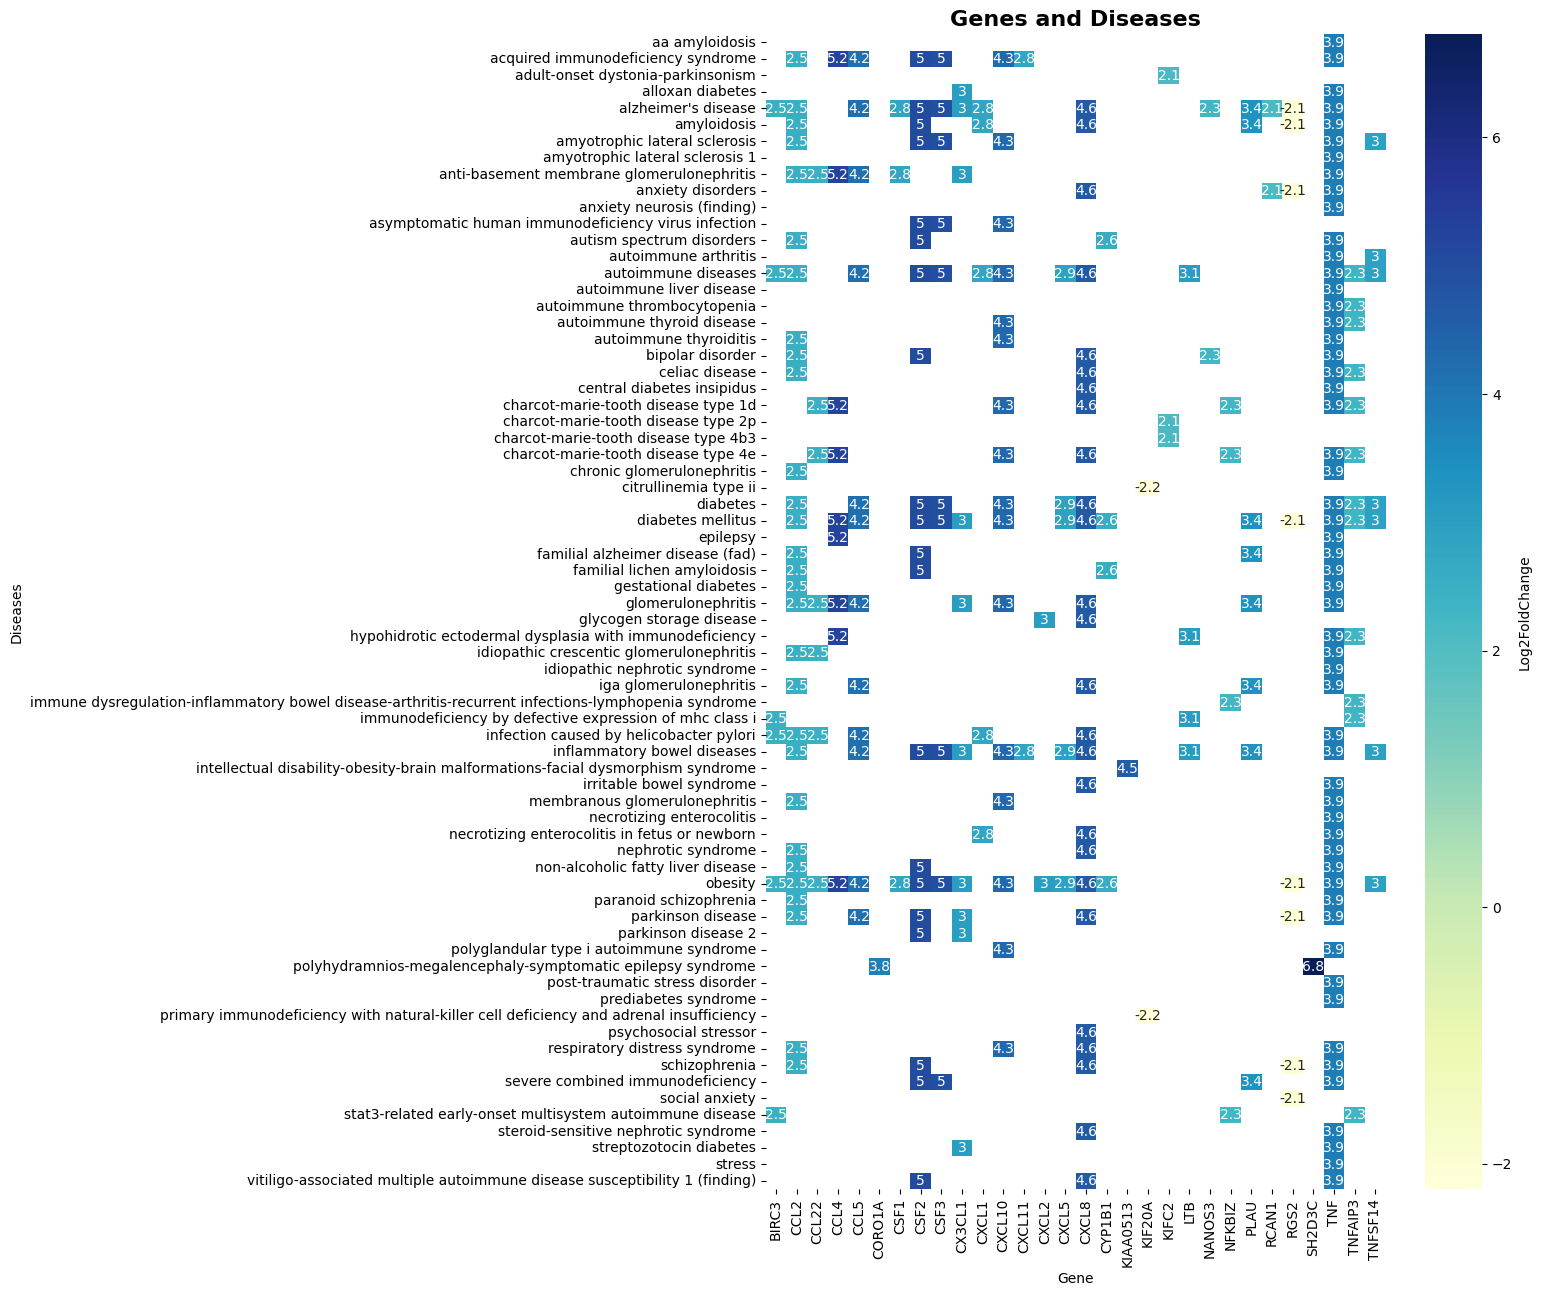

In [46]:
# Merge similar disease names
disease_mapping = {
    "Alzheimer Disease": "Alzheimer's Disease",
    "Anxiety": "Anxiety Disorders",
    "Anxiety state": "Anxiety Disorders",
    "Inflammatory Bowel Disease": "Inflammatory Bowel Diseases",
    "Autoimmune": "Autoimmune Diseases"
}

data['All Diseases'] = data['All Diseases'].replace(disease_mapping)


# Create Heatmap
# Pivot the dataframe to have diseases as rows and genes as columns
heatmap_data = data.pivot_table(index="All Diseases", columns="Gene", values="Log2FoldChange", aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Log2FoldChange'})
plt.title('Genes and Diseases', fontsize=16, fontweight='bold')
plt.xlabel('Gene')
plt.ylabel('Diseases')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()